### Problem Statement:


The Gurugram-based FlipItNews aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors

**Objective**:

The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models

### Attribute Information:

* Article
* Category

The feature names are themselves pretty self-explanatory.

####***Importing Libraries***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


import re
import random
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Download NLTK stopwords (only once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
!gdown --id 1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u -O /content/flipitnews-data.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u
To: /content/flipitnews-data.csv
100% 5.06M/5.06M [00:00<00:00, 26.8MB/s]


In [4]:
df = pd.read_csv('/content/flipitnews-data.csv')

In [5]:
df.shape

(2225, 2)

In [6]:
df.sample(10)

,Category,Article
516,Politics,labour mp praises tory campaign the conservati...
988,Sports,barcelona title hopes hit by loss barcelona s ...
2096,Sports,kewell waits as injury drags on liverpool wing...
1664,Sports,blues slam blackburn over savage birmingham ha...
953,Entertainment,hollywood hunts hits at sundance the sundance ...
683,Entertainment,celebrities get to stay in jungle all four con...
1850,Politics,kennedy to make temple address charles kennedy...
265,Sports,davenport hits out at wimbledon world number o...
609,Sports,england given tough sevens draw england will h...
895,Business,jp morgan admits us slavery links thousands of...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [8]:
df['Category'].value_counts()

,count
Category,
Sports,511
Business,510
Politics,417
Technology,401
Entertainment,386


we have 5 categories in dataset

#### **Data Understanding**

#### Find Maximum length in the Article

In [9]:
max_length = df['Article'].apply(lambda x : len(str(x))).max()

In [10]:
print("Maximum number of characters in an article:", max_length)

Maximum number of characters in an article: 25483


In [11]:
### Fetch article with maximum words
get_article = df.loc[df['Article'].apply(lambda x : len(str(x))).idxmax(), 'Article']

In [12]:
get_article

'terror powers expose  tyranny  the lord chancellor has defended government plans to introduce control orders to keep foreign and british terrorist suspects under house arrest  where there isn t enough evidence to put them on trial.  lord falconer insists that the proposals do not equate to a police state and strike a balance between protecting the public against the threat of terrorism and upholding civil liberties. but thriller writer frederick forsyth tells bbc news of his personal response to the move.    there is a mortal danger aimed at the heart of britain. or so says home secretary charles clarke. my reaction  so what  it is not that i am cynical or just do not care. i care about this country very much.  but in the 66 years that i have been alive  there has not been one hour  of one day  of one month  of one year  when there has not been a threat aimed at us. my point is  the british have always coped without becoming a dictatorship. we have coped with fear without becoming a s

#### Find Minimum length in the Article

In [13]:
min_length = df['Article'].apply(lambda x : len(str(x))).min()
min_length

501

In [14]:
### Fetch article with minimum words
get_article_min = df.loc[df['Article'].apply(lambda x : len(str(x))).idxmin(), 'Article']
get_article_min

'blunkett hints at election call ex-home secretary david blunkett has given fresh clues that the general election will be announced on monday.  he told bbc radio five live:  i m out in my constituency getting ready for what we presume will be an announcement very shortly at the weekend.  he clarified that he meant he would be in his sheffield seat this weekend  not that he expected an election call then. tony blair is tipped to ask the queen on monday to dissolve parliament ready for a 5 may poll.'

#### **Find and count the number of stop words**

In [15]:
corpus = " ".join(df['Article'])
words = re.findall(r'\b\w+\b', corpus.lower())

In [16]:
##corpus

In [17]:
list_stop_words = [word.lower() for word in words if word.lower() in stopwords.words('english')]

In [18]:
count_stop_words = Counter(list_stop_words)

In [19]:
stop_words_data = pd.DataFrame(count_stop_words.items(), columns=['Word', 'Count']).sort_values(by = 'Count', ascending = False)
stop_words_data.head()

,Word,Count
1,the,52636
10,to,25113
2,of,20008
4,and,18611
39,a,18323


In [20]:
stop_words_data.tail()

,Word,Count
144,ma,3
148,ain,2
147,yours,2
118,mustn,1
145,yourselves,1


In [21]:
stop_words_data.shape

(149, 2)

* In given Dataset, there are 149 stop words are present.
* **the, to, of, and, a** these are top 5 stop words.
* **ma, ain, yours, mustn, yourselves** there rare stop words present in dataset

#### **Count plot to understand the distribution of articles across different categories.**

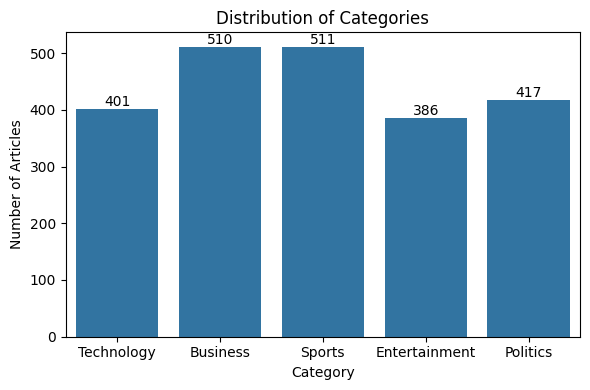

In [22]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Category', data=df)
for container in ax.containers:
    ax.bar_label(container)

ax.set_title('Distribution of Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Articles')

plt.tight_layout()
plt.show()

Most of the news articles in the dataset are belongs Business & Sports category.

#### **Visualize prominent words**

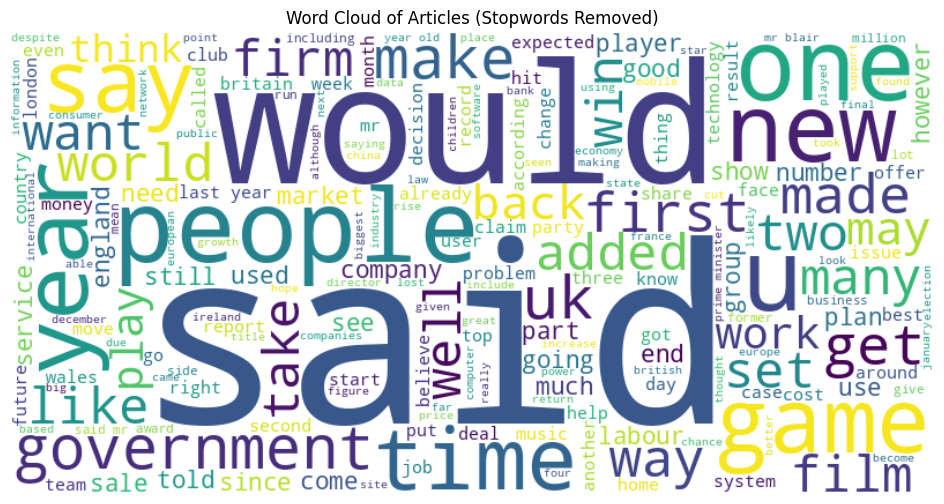

In [23]:
text = ' '.join(df['Article'].dropna().astype(str))
stop_words = set(stopwords.words('english')).union({'could', 'also', 'should',})

wordcloud = WordCloud(
    stopwords=stop_words,
    background_color='white',
    width=800,
    height=400
).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Articles (Stopwords Removed)")
plt.show()

In dataset word **'u'** is commanly apperas. Let's analyze word 'u'

####**Text Preprocessing**

In [24]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Article'] = df['Article'].astype(str).apply(preprocess_text)

In [25]:
df.head()

,Category,Article
0,Technology,tv future hand viewer home theatre system plas...
1,Business,worldcom bos left book alone former worldcom b...
2,Sports,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean twelve raid box office ocean twelve crim...


In [26]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Article'])

### **Cosine Similarity to check duplicate entries.**

* Articles can have duplicates with  some minor differences like ***rephrases sentences, small edits, formmating texts or added context***


In [27]:
cos_sim_matrix = cosine_similarity(tfidf_matrix)

threshold = 0.9  # Find highly similar pairs
similar_pairs = []

for i in range(cos_sim_matrix.shape[0]):
    for j in range(i + 1, cos_sim_matrix.shape[1]):
        if cos_sim_matrix[i, j] > threshold:
            similar_pairs.append((i, j, cos_sim_matrix[i, j]))

print(f"\nFound {len(similar_pairs)} highly similar article pairs.")

# Randomly sample 3 similar pairs
sampled_pairs = random.sample(similar_pairs, min(3, len(similar_pairs)))

print(f"\nShowing 3 out of {len(similar_pairs)} highly similar article pairs:")
for i, j, sim in sampled_pairs:
    print(f"\n[Cosine Similarity: {sim:.2f}]")
    print(f"→ A (Index {i}):", df.at[i, 'Article'])
    print(f"→ B (Index {j}):", df.at[j, 'Article'])


Found 166 highly similar article pairs.

Showing 3 out of 166 highly similar article pairs:

[Cosine Similarity: 1.00]
→ A (Index 889): mobile rack year use mobile phone uk celebrating th anniversary weekend britain first mobile phone call made across vodafone network january veteran comedian ernie wise year since day mobile phone become integral part modern life almost briton handset mobile become popular many people use handset phone rarely use landline first ever call portable phone made new york took year first commercial mobile service launched uk far behind rest world setting network let people make call walked first call made st katherine dock vodafone head office newbury time curry house first nine day vodafone firm mobile network uk january cellnet launched service mike caudwell spokesman vodafone said phone launched size briefcase cost battery life little minute despite hugely popular mids said became yuppy musthave status symbol among young wealthy business folk also despit

In [28]:
df.iloc[1936]

,1936
Category,Technology
Article,power people say hp digital revolution focused...


In [29]:
df.iloc[635]

,635
Category,Technology
Article,power people say hp digital revolution focused...


Need to remove duplicate text

In [30]:
# Drop exact duplicates
df = df.drop_duplicates(subset='Article').reset_index(drop=True)


In [31]:
df.iloc[1936]

,1936
Category,Entertainment
Article,indie film nomination announced mike leigh awa...


In [32]:
df.iloc[635]

,635
Category,Business
Article,borussia dortmund near bust german football cl...


We have removed all duplicate entries


#### **Find location for word 'u'**

In [33]:
all_text = ' '.join(df['Article'].astype(str)).lower()
u_occurrences = re.findall(r'\bu\b', all_text)
print(f"\n The word 'u' appears {len(u_occurrences)} times in the dataset.")

df_u = df[df['Article'].str.contains(r'\bu\b', case=False, na=False)]
print(f"\n🧾 Articles containing the word 'u': {len(df_u)}")
print(df_u[['Category', 'Article']])


 The word 'u' appears 1876 times in the dataset.

🧾 Articles containing the word 'u': 801
           Category                                            Article
0        Technology  tv future hand viewer home theatre system plas...
4     Entertainment  ocean twelve raid box office ocean twelve crim...
7            Sports  henman hope ended dubai third seed tim henman ...
9     Entertainment  last star war child sixth final star war movie...
12         Business  crude oil price back cold weather across part ...
...             ...                                                ...
2110  Entertainment  top star join u tsunami tv show brad pitt robe...
2113       Business  car pull u retail figure u retail sale fell ja...
2115  Entertainment  rem announce new glasgow concert u band rem an...
2116       Politics  political squabble snowball become commonplace...
2117         Sports  souness delight euro progress bos graeme soune...

[801 rows x 2 columns]


#### **Find words after 'u'**

In [34]:
pattern = r'\bu\s+(\w+)'

# Apply regex to extract next word after 'u'
df['WordAfterU'] = df['Article'].str.extract(pattern, expand=False)

# Filter rows where 'u' appears and show 'u' + next word
u_matches = df[df['WordAfterU'].notnull()][['Article', 'WordAfterU']]

print(u_matches.head(10))

                                              Article    WordAfterU
0   tv future hand viewer home theatre system plas...       leading
4   ocean twelve raid box office ocean twelve crim...           box
7   henman hope ended dubai third seed tim henman ...          play
9   last star war child sixth final star war movie...            tv
12  crude oil price back cold weather across part ...         crude
14  moya emotional davis cup win carlos moya descr...          lost
16  howard back stem cell research michael howard ...  presidential
17  connors boost british tennis former world numb...          like
20  security warning fbi virus u federal bureau in...       federal
24  mobile audio enters new dimension mobile phone...      european


In [35]:
u_matches['WordAfterU'].unique()

array(['leading', 'box', 'play', 'tv', 'crude', 'lost', 'presidential',
       'like', 'federal', 'european', 'tournament', 'terror', 'computer',
       'make', 'insurance', 'japan', 'digital', 'nea', 'try', 'tough',
       'giant', 'back', 'anything', 'regulator', 'played', 'government',
       'firm', 'china', 'court', 'bid', 'company', 'th', 'serial', 'camp',
       'winter', 'hiphop', 'television', 'open', 'meeting', 'say',
       'great', 'likely', 'trade', 'disciplinary', 'safety', 'research',
       'new', 'technology', 'coproductions', 'improve', 'dollar',
       'insurer', 'seek', 'adding', 'read', 'actor', 'add', 'car',
       'orange', 'remote', 'actually', 'lawmaker', 'airline', 'plan',
       'usher', 'budget', 'mainland', 'analyst', 'photographer', 'today',
       'objection', 'may', 'inside', 'agreed', 'telco', 'district',
       'growth', 'law', 'become', 'peter', 'two', 'u', 'aircraft',
       'later', 'first', 'tour', 'uncomfortable', 'australian', 'air',
       'aust

In [36]:
u_next_word_counts = df['WordAfterU'].value_counts()
print(u_next_word_counts.head(20))

WordAfterU
dollar          21
open            18
court           14
box             11
tv              11
firm            10
said             8
rapper           6
television       6
film             6
president        6
phone            6
bank             6
stock            5
consumer         5
tycoon           5
presidential     5
japan            5
top              5
growth           5
Name: count, dtype: int64


* Most of these words suggest 'u' is a shorthand for "U.S.".
* 'u retail', 'u band', 'u government', 'u court', 'u president', 'u aircraft'
→ These likely refer to "U.S." or "United States" but written as just 'u'.


#### **Enconding Terget variable**

In [37]:
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [38]:
df.head()

,Category,Article,WordAfterU
0,4,tv future hand viewer home theatre system plas...,leading
1,0,worldcom bos left book alone former worldcom b...,NaN
2,3,tiger wary farrell gamble leicester say rushed...,NaN
3,3,yeading face newcastle fa cup premiership side...,NaN
4,1,ocean twelve raid box office ocean twelve crim...,box


In [39]:
df.drop(columns = 'WordAfterU', inplace = True)

####**Perform Train-Test split**

In [40]:
# Regenerated the TF-IDF matrix, as we have dropped duplicates
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Article'])


X = tfidf_matrix.toarray()
Y = np.array(df['Category'].values)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,
                                                  shuffle=True, stratify=Y,
                                                  random_state=42)

In [41]:
print("No. of rows in train set is {}.".format(X_train.shape[0]))
print("No. of rows in test set is {}.".format(X_test.shape[0]))

No. of rows in train set is 1588.
No. of rows in test set is 530.


###**Model Building**

####**Naive Bayes Classifier**

In [42]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

####Calculate Accuracy

In [43]:
train_naive_acc = accuracy_score(y_train, nb.predict(X_train))
test_naive_acc = accuracy_score(y_test, nb.predict(X_test))

print("Train accuracy :{:.3f}".format(train_naive_acc))
print("Test accuracy :{:.3f}".format(test_naive_acc))

Train accuracy :0.989
Test accuracy :0.955


In [44]:
### Calculate Score
y_pred_naive = nb.predict(X_test)
y_pred_prob = nb.predict_proba(X_test)
print("ROC AUC Score: {:.3f}".format(roc_auc_score(y_test, y_pred_prob, multi_class='ovr'))) ### ROC Curve
precision = precision_score(y_test, y_pred_naive, average='weighted') ### Precision
recall = recall_score(y_test, y_pred_naive, average='weighted') ### recall
f1 = f1_score(y_test, y_pred_naive, average='weighted') ### F1 Score

print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))

ROC AUC Score: 0.999
Precision: 0.957
Recall: 0.955
F1 Score: 0.954


####Plotting the Confusion Matrix

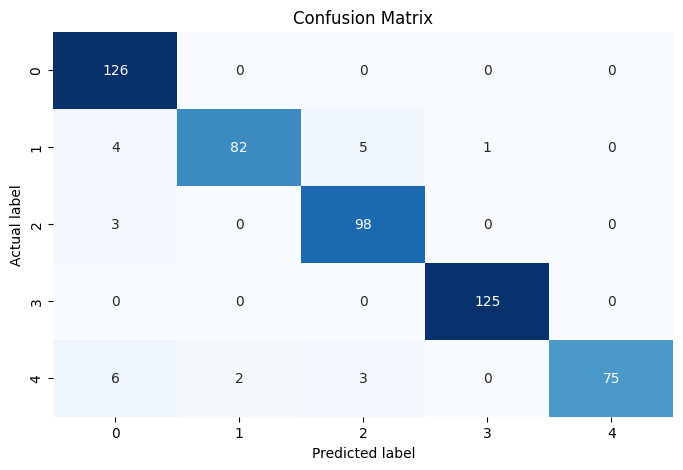

In [45]:
cm = confusion_matrix(y_test, y_pred_naive)

plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [46]:
print(classification_report(y_test, y_pred_naive))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       126
           1       0.98      0.89      0.93        92
           2       0.92      0.97      0.95       101
           3       0.99      1.00      1.00       125
           4       1.00      0.87      0.93        86

    accuracy                           0.95       530
   macro avg       0.96      0.95      0.95       530
weighted avg       0.96      0.95      0.95       530



**Overall Accuracy:** 0.95 → The model correctly predicted 95% of test samples.

***Class 0:***  Very high recall (1.00) → All actual class 0s were identified.

***Class 1:*** High precision (0.98) but slightly lower recall (0.89) → Few class 1s were missed.

***Class 3:*** Perfect performance (F1 = 1.00).

***Class 4:*** Perfect precision (1.00) but recall is 0.87 → Some true class 4s were misclassified.

###**Other Classification models**

In [47]:
def train_model(model, X_tr, y_tr, X_val):
    """
    Trains the given model and returns predictions and predicted probabilities.
    """
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)
    return y_pred, y_proba


def evaluate_model(model, X_tr, y_tr, X_val, y_val, y_pred, y_proba):
    """
    Evaluates the model using accuracy, ROC AUC, precision, recall, and F1 score.
    """
    print("\n-------------------------")

    train_acc = accuracy_score(y_tr, model.predict(X_tr))
    val_acc = accuracy_score(y_val, y_pred)

    print("Train Accuracy: {:.3f}".format(train_acc))
    print("Validation Accuracy: {:.3f}".format(val_acc))

    try:
        roc_auc = roc_auc_score(y_val, y_proba, multi_class='ovr')
        print("ROC AUC Score: {:.3f}".format(roc_auc))
    except:
        print("ROC AUC Score: Not available (likely unsupported classifier or binary problem)")

    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("F1 Score: {:.3f}".format(f1))

    print("\nClassification Report:\n")
    print(classification_report(y_val, y_pred))

    print("-------------------------")

####**K-Nearest Neighbors Classifier**

In [48]:
knn = KNeighborsClassifier(n_neighbors=5) ##Model Creation

y_pred_knn, y_pred_proba_knn = train_model(knn, X_train, y_train, X_test) ### Model Training

# Pass the training and testing data, along with predictions and probabilities
evaluate_model(knn, X_train, y_train, X_test, y_test, y_pred_knn, y_pred_proba_knn) ### Model Evaluation


-------------------------
Train Accuracy: 0.962
Validation Accuracy: 0.949
ROC AUC Score: 0.990
Precision: 0.949
Recall: 0.949
F1 Score: 0.949

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       126
           1       0.94      0.91      0.93        92
           2       0.93      0.98      0.95       101
           3       0.99      0.98      0.98       125
           4       0.93      0.90      0.91        86

    accuracy                           0.95       530
   macro avg       0.95      0.94      0.95       530
weighted avg       0.95      0.95      0.95       530

-------------------------


####**Random Forest Classifier**

In [49]:

rf = RandomForestClassifier(n_estimators=100, random_state=42) # Model Creation

y_pred_rf, y_pred_proba_rf = train_model(rf, X_train, y_train, X_test) ### Model Training

# Pass the training and testing data, along with predictions and probabilities
evaluate_model(rf, X_train, y_train, X_test, y_test, y_pred_rf, y_pred_proba_rf) ### Model Evaluation


-------------------------
Train Accuracy: 1.000
Validation Accuracy: 0.958
ROC AUC Score: 0.998
Precision: 0.960
Recall: 0.958
F1 Score: 0.959

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       126
           1       0.98      0.96      0.97        92
           2       0.98      0.92      0.95       101
           3       0.98      1.00      0.99       125
           4       0.98      0.92      0.95        86

    accuracy                           0.96       530
   macro avg       0.96      0.95      0.96       530
weighted avg       0.96      0.96      0.96       530

-------------------------


           Model  Train Accuracy  Validation Accuracy  ROC AUC Score  \
0    Naive Bayes           0.989                0.955          0.999   
1            KNN           0.962                0.949          0.990   
2  Random Forest           1.000                0.958          0.998   

   Precision  Recall  F1 Score  
0      0.957   0.955     0.954  
1      0.949   0.949     0.949  
2      0.960   0.958     0.959  


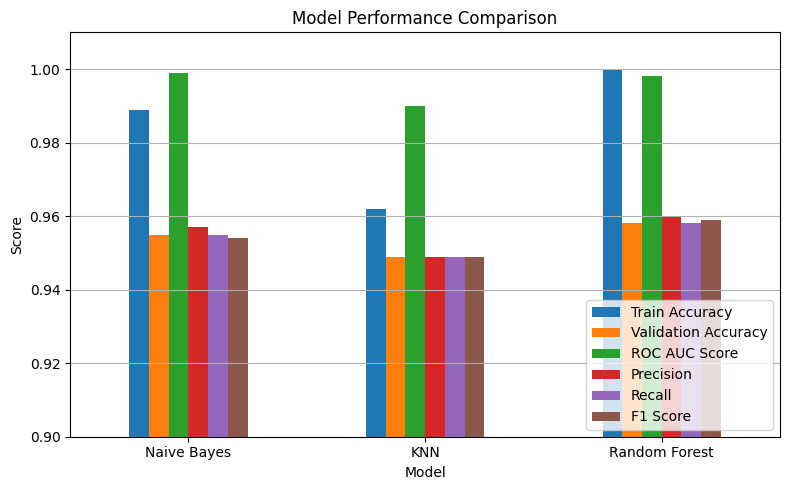

In [50]:
# Create a DataFrame with model performance metrics
model_results = pd.DataFrame({
    'Model': ['Naive Bayes', 'KNN', 'Random Forest'],
    'Train Accuracy': [0.989, 0.962, 1.000],
    'Validation Accuracy': [0.955, 0.949, 0.958],
    'ROC AUC Score': [0.999, 0.990, 0.998],
    'Precision': [0.957, 0.949, 0.960],
    'Recall': [0.955, 0.949, 0.958],
    'F1 Score': [0.954, 0.949, 0.959]
})

# Display the DataFrame
print(model_results)

# Plot comparison
metrics = ['Train Accuracy', 'Validation Accuracy', 'ROC AUC Score', 'Precision', 'Recall', 'F1 Score']
model_results.set_index('Model')[metrics].plot(kind='bar', figsize=(8, 5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.9, 1.01)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

#### **Insights**
* **Naive Bayes** performs excellently with high ROC AUC (0.999) and generalizes well (small gap between train and test accuracy), indicating robustness and less overfitting.

* **KNN** performs slightly lower on all metrics, and could be sensitive to data scaling and neighborhood choice. Still a solid performer.

* **Random Forest** has the highest overall performance, perfect train accuracy (possible overfitting), and best general test scores (accuracy, precision, recall, F1).

####**Recommendation**
* Random Forest is the top performer overall in terms of predictive power.

* Naive Bayes is a close second, simpler and faster, suitable if interpretability and speed matter.

* KNN is decent but not optimal here; may benefit from tuning k or scaling.